# 앙상블 알고리즘 

###  라이브러리 임포트 

In [70]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

from sklearn.model_selection import train_test_split #데이터셋 분리 
from sklearn.preprocessing import StandardScaler

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

# Boosting 

## Adaboosting
### from sklearn.ensemble import AdaBoostClassifier 
- base_estimators : 학습에 사용하는 알고리즘, default : None → DecisionTreeClassifier(max_depth = 1) 이 적용
- n_estimators : 생성할 약한 학습기의 개수를 지정, default : 50
- learning_rate : 학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default : 1

[1 1]
          0         1
0  1.850738  0.094793
1  0.736410 -0.204975
2  1.378246 -0.514098


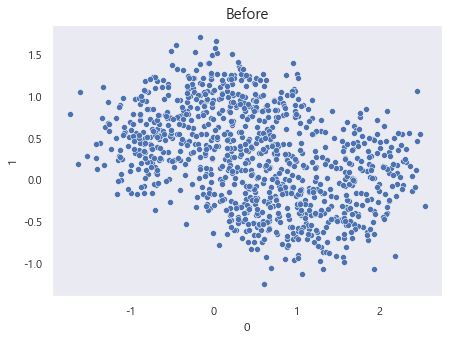

In [112]:
from sklearn.datasets import make_moons

## 데이터 셋 생성 
X, y = make_moons(n_samples=1000, noise=0.30, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

## 데이터 셋 확인 
df_a = pd.DataFrame(X)
print(y[:2])
print(df_a.head(3))

# x 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=df_a[0], y=df_a[1], palette="Set2")
plt.grid()
plt.show()

In [113]:
## 라이브러리
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 기본적인 AdaBoost
clf_a = AdaBoostClassifier(n_estimators=5, random_state=20)
clf_a.fit(X_train, y_train) 
pred=clf_a.predict(X_test)
print("기본적인 AdaBoost 정확도:", accuracy_score(y_test, pred))

기본적인 AdaBoost 정확도: 0.868


In [114]:
## DecisionTree를 활용한 Adaboost

tree_clf = DecisionTreeClassifier(max_depth=5)
clf_a_t = AdaBoostClassifier(base_estimator = tree_clf, n_estimators=5, random_state=20)
clf_a_t.fit(X_train, y_train) 
pred=clf_a_t.predict(X_test)
print("Decision Tree AdaBoost 정확도:", accuracy_score(y_test, pred))

Decision Tree AdaBoost 정확도: 0.888


In [115]:
## DecisionTree를 활용한 Adaboost(n_estimators=100)

tree_clf = DecisionTreeClassifier(max_depth=5)
clf_a_t_100 = AdaBoostClassifier(base_estimator = tree_clf, n_estimators=100, random_state=20)
clf_a_t_100.fit(X_train, y_train) 
pred=clf_a_t_100.predict(X_test)

print("Decision Tree AdaBoost(트리 100개) 정확도:", accuracy_score(y_test, pred))

Decision Tree AdaBoost(트리 100개) 정확도: 0.896


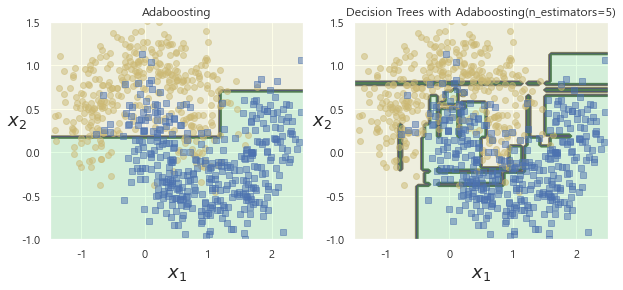

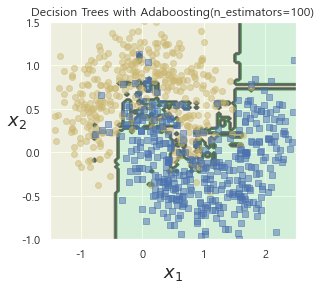

In [116]:
## 시각화 
from matplotlib.colors import ListedColormap

# 시각화 함수 
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
   
## Adaboosting 
plt.figure(figsize=(10,4))
plt.subplot(121)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a, X_train, y_train) 
plt.title("Adaboosting", fontsize=12)

# Decision Trees with Adaboosting(n_estimators=5)
plt.subplot(122)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a_t, X_train, y_train) 
plt.title("Decision Trees with Adaboosting(n_estimators=5)", fontsize=12)
plt.show()

# Decision Trees with Adaboosting(n_estimators=100)
plt.figure(figsize=(15,4))
plt.subplot(132)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a_t_100, X_train, y_train) 
plt.title("Decision Trees with Adaboosting(n_estimators=100)", fontsize=12)
plt.show()

# xgboost
### from xgboost import XGBClassifier
#### General Parameters (XGBoost 의 어떤 모델)
- booster : default = 'gbtree'(gbtree : 트리 기반 모델, gblinear : 선형 모델)
- silent : default = 0(0 : 동작 메세지 프린트 함, 1 : 동작 메세지 프린트 안함)
- nthread : default = 전체 다 사용

#### Booster Parameters (모델의 조건 설정)
- n_estimators : 분류기 나무의 개수, default = 100
- early_stopping_rounds
- learning_rate : 학습 단계별로 가중치, default = 0.1
- max_depth : 트리의 깊이, default = 6 
- reg_alpha :L1 regularization
- reg_lambda : L2 regularization

#### Learning Task Parameters (모델의 목표 및 계산 방법 설정)
- objective : 목적 함수, default = reg:linear
 - binary:logistic(확률 반환), multi:softmax(클래스 반환), multi:softprob(확률 반환) 
- eval_metric : 평가 지표(회귀-rmse,... / 분류-error, ...)
- seed :고정값 default = 0

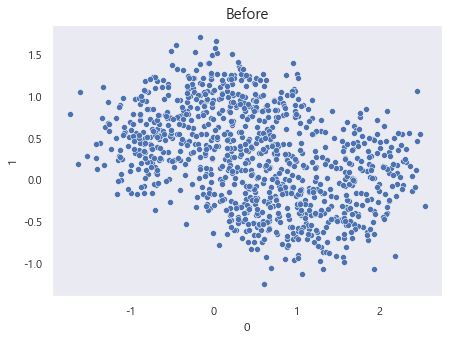

(640, 2) (640,) (160, 2) (160,) (200, 2) (200,)


In [79]:
## 데이터 셋 생성 
X, y = make_moons(n_samples=1000, noise=0.30, random_state=20)

# x 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=df_a[0], y=df_a[1], palette="Set2")
plt.grid()
plt.show()

# Train, Test Set 생성 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train, Validaton set 생성 
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.2, 
                                                  random_state=20)

# 결과 확인 
print(X_train.shape,y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

In [80]:
## Xgboosting 
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## 단순한 XGboost 
# 객체 생성
xgb_clf = XGBClassifier(objective = 'binary:logistic', eval_metric = 'auc') 
xgb_model = xgb_clf.fit(X_train, y_train)

# 예측하기
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)

# 결과 확인 
print(accuracy_score(y_test, y_pred))

# # 특성 중요도 확인 
ftr_importances_values = xgb_model.feature_importances_
print(ftr_importances_values)

0.885
[0.4482242  0.55177575]


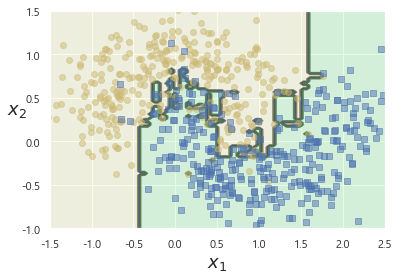

In [81]:
## 시각화 
plot_decision_boundary(xgb_clf, X_train, y_train) 

In [17]:
### 파라미터 입력한 XGboost 
# 분류기 100, 학습 조정률 : 0.03, L1 regularization :0.03
xgb_clf_a = XGBClassifier(n_estimators=100, 
                          learning_rate=0.03, 
                          max_depth=5,  
                          reg_alpha=0.03,
                          verbosity = 0,
                          objective = 'binary:logistic',
                          eval_metric='auc'
#                           silent= True, 
                          )

# 50라운드에서 조기 종료 확인 
xgb_model_a = xgb_clf_a.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.94729
[1]	validation_0-auc:0.94776
[2]	validation_0-auc:0.94902
[3]	validation_0-auc:0.94902
[4]	validation_0-auc:0.94902
[5]	validation_0-auc:0.94745
[6]	validation_0-auc:0.94698
[7]	validation_0-auc:0.95114
[8]	validation_0-auc:0.95067
[9]	validation_0-auc:0.95035
[10]	validation_0-auc:0.95035
[11]	validation_0-auc:0.94941
[12]	validation_0-auc:0.95012
[13]	validation_0-auc:0.94973
[14]	validation_0-auc:0.94973
[15]	validation_0-auc:0.94878
[16]	validation_0-auc:0.94925
[17]	validation_0-auc:0.94973
[18]	validation_0-auc:0.94925
[19]	validation_0-auc:0.95020
[20]	validation_0-auc:0.94957
[21]	validation_0-auc:0.95059
[22]	validation_0-auc:0.95059
[23]	validation_0-auc:0.95059
[24]	validation_0-auc:0.95027
[25]	validation_0-auc:0.95035
[26]	validation_0-auc:0.95129
[27]	validation_0-auc:0.95098
[28]	validation_0-auc:0.95098
[29]	validation_0-auc:0.95098
[30]	validation_0-auc:0.95004
[31]	validation_0-auc:0.95286
[32]	validation_0-auc:0.95482
[33]	validation_0-au

In [82]:
# ## 결과 예측 
xgb_model_a.predict(X_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

In [83]:
# 결과 확인 
y_pred_b = xgb_model_a.predict(X_test)
print(accuracy_score(y_test, y_pred_b))

# # 특성 중요도 확인 
ftr_importances_values = xgb_model_a.feature_importances_
print(ftr_importances_values)

0.92
[0.4033108 0.5966893]


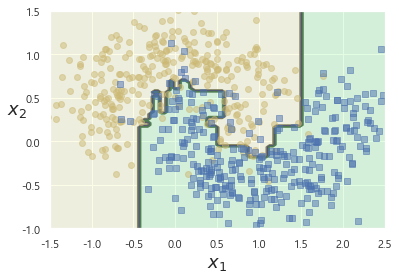

In [84]:
## 시각화 
plot_decision_boundary(xgb_model_a, X_train, y_train) 

# Random Forest 
##  Random Forest Regressor
### from sklearn.ensemble import RandomForestRegressor
- criterion{“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
- n_estimators : 결정트리의 갯수를 지정, Default = 10
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수, Default = 2
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' 
- max_depth	: 트리의 최대 깊이, default = None
- max_leaf_nodes : 리프노드의 최대 개수
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
- verbose : 실행 과정 출력 여부(1: 출력)
- random_state : 난수 seed 설정

In [85]:
## Boston Housing Price (보스턴 주택 가격 데이터)
from sklearn.datasets import load_boston

data_b = load_boston()
df_b = pd.DataFrame(data_b.data, columns=data_b.feature_names)

df_b['MEDV'] = data_b.target
print(df_b.shape)
df_b.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [86]:
## 각 변수 p-value < 0.05 미만 제거 
## 변수 선택 
feature_columns = list(df_b.columns.difference(['INDUS', 'AGE','ZN', 'MEDV']))

# 변수 확정 
X = df_b[feature_columns] # 설명변수 

## 스케일링 & 정규화
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## 데이터 생성 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_std,
                                                            data_b.target, 
                                                            test_size=0.2, 
                                                            random_state=20)

In [87]:
feature_columns

['B', 'CHAS', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX']

In [88]:
X_train_b[0]

array([ 0.44105193, -0.27259857, -0.40369567,  1.02463789,  0.91070021,
       -0.26515405, -1.50523663, -0.52300145, -0.16046556, -0.57751897])

In [89]:
y_train_b[0]

27.1

In [90]:
## 랜덤포레스트 특정 모델 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_refressor = RandomForestRegressor(random_state=5,
                                     max_depth=2,
                                     min_samples_split=8,
                                     n_estimators=10)

rf_refressor.fit(X_train_b, y_train_b)

## 성능 평가 
# R2 Score
print("R2 Score:", rf_refressor.score(X_train_b, y_train_b, sample_weight=None))

# train rmse
train_predict = rf_refressor.predict(X_train_b)
print("train RMSE: {}".format(sqrt(mean_squared_error(train_predict, y_train_b)))) # RMSE 결과
 
# test rmse
test_predict = rf_refressor.predict(X_test_b)
print("test RMSE':{}".format(sqrt(mean_squared_error(test_predict, y_test_b))) )

R2 Score: 0.7688954604830929
train RMSE: 4.540534729949297
test RMSE':4.757221213720513


In [91]:
## 랜덤포레스트 하이퍼 파리미터 조정 
rf_refressor_1 = RandomForestRegressor(random_state=5,
                                       max_depth=7, 
                                       min_samples_split=8,
                                       n_estimators=100)

rf_refressor_1.fit(X_train_b, y_train_b)


## 성능 평가 
# R2 Score
print("R2 Score:", rf_refressor_1.score(X_train_b, y_train_b, sample_weight=None))

# train rmse
train_predict = rf_refressor_1.predict(X_train_b)
print("train RMSE: {}".format(sqrt(mean_squared_error(train_predict, y_train_b)))) 
 
# test rmse
test_predict = rf_refressor_1.predict(X_test_b)
print("test RMSE':{}".format(sqrt(mean_squared_error(test_predict, y_test_b))) )

R2 Score: 0.9637088807833315
train RMSE: 1.7992973683682778
test RMSE':3.757484060013128


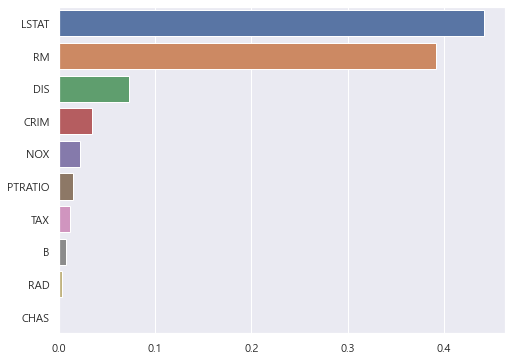

In [92]:
## 변수 중요도 시각화 

ftr_importances_values = rf_refressor_1.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=feature_columns)

ftr_top = ftr_importances.sort_values(ascending=False)
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

##  Random Forest Classifier
### from sklearn.ensemble import RandomForestClassifier
- criterion : 분할 품질을 측정,“gini”, “entropy”, “log_loss", (default : gini)”
- n_estimators : 결정트리의 갯수를 지정, Default = 10
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수, Default = 2
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' 
- max_depth	: 트리의 최대 깊이, default = None
- max_leaf_nodes : 리프노드의 최대 개수
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
- verbose : 실행 과정 출력 여부(1: 출력)
- random_state : 난수 seed 설정
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부

### 위스콘신 유방암(breast cancer) 데이터 셋 
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별
- 30개의 속성과 malignant(악성:0), benign(양성1)의 두가지 타겟 데이터로 구성 : 총 31개 
- radius(반경)
- texture(질감)
- perimeter(둘레)
- area(면적)
- smoothness(매끄러움)
- compactness(작은 적도)
- concavity(오목함)
- concave_points(오목한 점의 수)
- symmetry(대칭)
- fractal_dimension(프랙탈 차원)
- 위 10개 세포의 특성 항목에 대해 각각평균(mean), 표준오차(error), 큰 값 3개의 평균(worst) 값을 속성으로 구성 

In [93]:
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data.data

# 종양: target data 
# 악성(malignant:0), 양성(benign:1), 
b_target_data = data.target

# 종양 구분 
tumar = data.target_names

# 속성 명칭 
feature_names = data.feature_names

# print('종양 여부 결정 속성 : {}'.format(feature_names))
# print('종양 구분 : {}'.format(tumar))

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기 
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

In [94]:
breast_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [95]:
# label 데이터 비율 확인 
breast_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [96]:
## 학습 데이터 셋 생성 

# 평균관련 된 3개의 속성으로 종양 여부 판단 
breast_feature = ['mean_radius', 'mean_texture', 'mean_perimeter' ]

X = breast_df[breast_feature] # 독립변수 

Y = breast_df['target']

## 표준점수로 데이터 스케일링

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터 
X_train, X_test, y_train, y_test = train_test_split(train_scaled, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 20) 

In [97]:
X_train

array([[-1.34347001,  0.55625084, -1.32710844],
       [ 3.77531785,  1.62437465,  3.91022552],
       [-0.1270372 , -0.68873007, -0.17337093],
       ...,
       [-0.80583113, -1.45433516, -0.81305474],
       [-0.92227695, -0.85395184, -0.8880209 ],
       [-0.4451331 , -0.05111368, -0.4139217 ]])

In [105]:
## 기본적인 randomforest모형
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

rf_clf = RandomForestClassifier(random_state=20, oob_score = True)
rf_clf.fit(X_train,y_train)

predict1 = rf_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, predict1))

print("oob score", rf_clf.oob_score_) # oob score 

accuracy: 0.9035087719298246
oob score 0.8901098901098901


In [106]:
# Random Forest Tree 깊이 증가

# 트리 구성 : 200개, 트리 깊이 : 100(max_depth)
rf_clf_2 = RandomForestClassifier(n_estimators=200, max_depth=2,random_state=20, oob_score = True)
rf_clf_2.fit(X_train,y_train)

predict2 = rf_clf_2.predict(X_test)
print("accuracy:", accuracy_score(y_test,predict2))

print("oob score", rf_clf_2.oob_score_) # oob score (트리 다양성 증가 -> 감소 )

accuracy: 0.9210526315789473
oob score 0.8747252747252747


In [103]:
## 예측 대상 
print(X_test[:4])

## 예측 대상의 정답 
print("실제 정답", np.array(y_test[:4]))

## 예측 결과 
predict2[:4]

[[-0.97055937  0.25605918 -0.92550398]
 [ 0.42111019  0.0210254   0.33079712]
 [ 1.27883307  1.35443486  1.35231409]
 [-0.60418105  2.08047981 -0.62605123]]
실제 정답 [1 0 0 1]


array([1, 0, 0, 1])

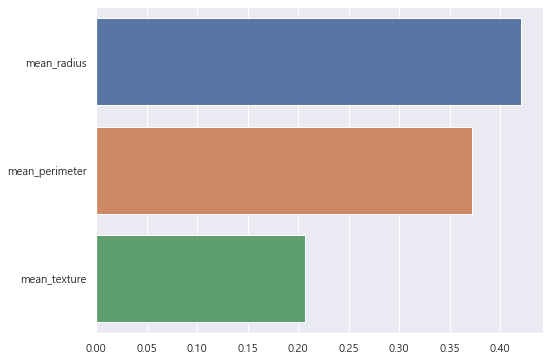

In [104]:
## 변수 중요도 시각화 
    
ftr_impo_val_clf2 = rf_clf_2.feature_importances_

ftr_importa_visual = pd.Series(ftr_impo_val_clf2, index=breast_feature)

ftr_top = ftr_importa_visual.sort_values(ascending=False)
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
